In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/giasmp/GiaSmp.csv


In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from hmmlearn import hmm
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/giasmp/GiaSmp.csv', encoding = 'ISO-8859-1')
df.head(10)

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1/1/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,2/1/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,3/1/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,4/1/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,5/1/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
5,6/1/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
6,7/1/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
7,8/1/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
8,9/1/2021,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,...,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1
9,10/1/2021,966.7,966.7,966.7,966.7,966.7,966.7,966.7,966.7,966.7,...,966.8,966.8,966.8,966.8,966.8,966.8,966.7,966.7,966.7,966.7


In [4]:
data = pd.concat([df['Ngày'],df["34"], df['35'], df['36']], axis=1)
data.head(10)

,Ngày,34,35,36
0,1/1/2021,964.4,964.4,964.4
1,2/1/2021,1019.7,1019.7,1019.7
2,3/1/2021,988.4,988.4,988.4
3,4/1/2021,1010.8,1010.8,1010.8
4,5/1/2021,1061.5,1061.5,1061.5
5,6/1/2021,1061.5,1061.5,1061.5
6,7/1/2021,1061.5,1061.5,1061.5
7,8/1/2021,1061.5,1061.5,1061.5
8,9/1/2021,1064.1,1064.1,1064.1
9,10/1/2021,966.8,966.8,966.8


In [5]:
# Chọn cột đầu tiên của giá trị làm chuỗi thời gian
time_series = data["34"].values
# Chuyển đổi chuỗi thời gian thành định dạng mà HMM có thể sử dụng
time_series = np.round(time_series).astype(int).reshape(-1, 1)

In [6]:
# Khởi tạo mô hình HMM với số lượng trạng thái ẩn
model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)

# Huấn luyện mô hình HMM
model.fit(time_series)

# Dự báo giá trị tương lai
# Số lượng bước dự báo
n_steps = 20

# Sử dụng trạng thái cuối cùng để dự báo giá trị tương lai
last_value = time_series[-1].reshape(1, -1)
predictions = []

for _ in range(n_steps):
    next_value = model.sample(1)[0]
    predictions.append(next_value[0])
    last_value = next_value

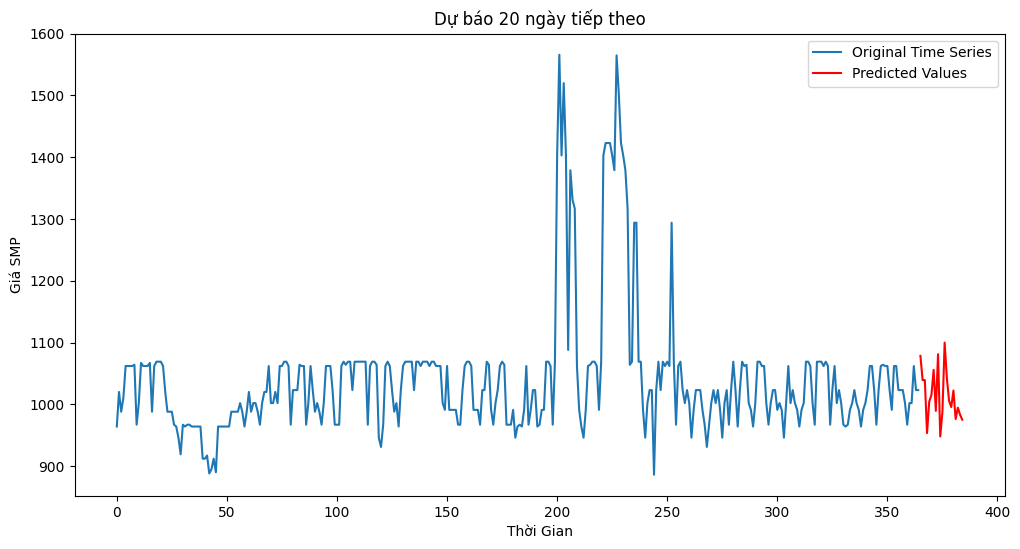

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(time_series)), time_series, label="Original Time Series")
plt.plot(range(len(time_series), len(time_series) + n_steps), predictions, label="Predicted Values", color='red')
plt.legend()
plt.xlabel("Thời Gian")
plt.ylabel("Giá SMP")
plt.title("Dự báo 20 ngày tiếp theo")
plt.show()

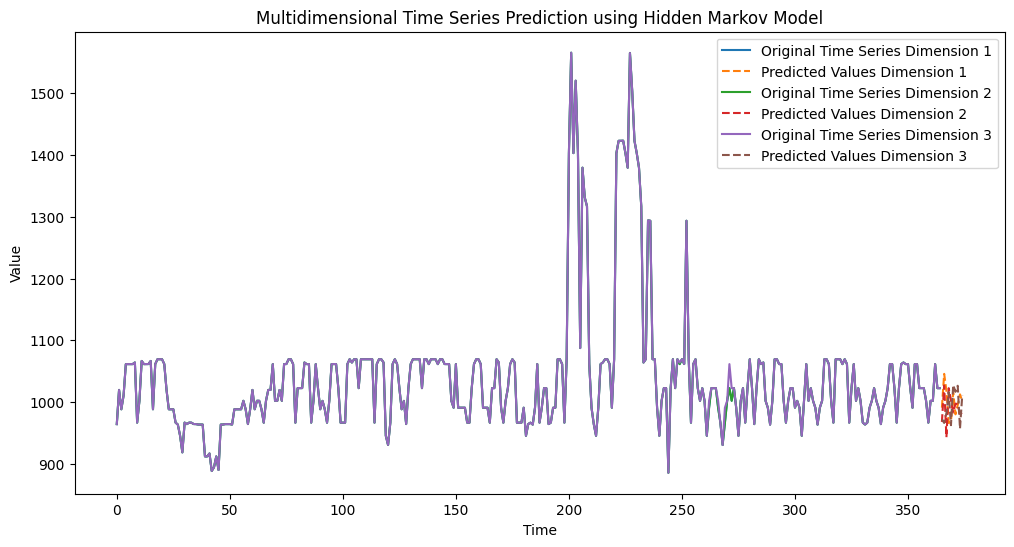

In [8]:
time_series = data.drop(columns=['Ngày']).values
# Khởi tạo mô hình HMM với số lượng trạng thái ẩn
model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)

# Huấn luyện mô hình HMM
model.fit(time_series)

# Dự báo giá trị tương lai
# Số lượng bước dự báo
n_steps = 10

# Sử dụng trạng thái cuối cùng để dự báo giá trị tương lai
last_values = time_series[-1].reshape(1, -1)
predictions = []

for _ in range(n_steps):
    next_values = model.sample(1)[0]
    predictions.append(next_values[0])
    last_values = next_values

# Chuyển đổi danh sách các dự báo thành mảng numpy
predictions = np.array(predictions)

# Vẽ biểu đồ chuỗi thời gian gốc và giá trị dự báo cho từng chiều
plt.figure(figsize=(12, 6))
for i in range(time_series.shape[1]):
    plt.plot(range(len(time_series)), time_series[:, i], label=f"Original Time Series Dimension {i+1}")
    plt.plot(range(len(time_series), len(time_series) + n_steps), predictions[:, i], label=f"Predicted Values Dimension {i+1}", linestyle='--')

plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Multidimensional Time Series Prediction using Hidden Markov Model")
plt.show()